In [31]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import ssl
import os    
ssl._create_default_https_context = ssl._create_unverified_context
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
torch.cuda.is_available()
device = torch.cuda.is_available()

In [32]:
# Define a transformation to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

# Load the cifar-10 training and test datasets
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_size = 40000
val_size = 10000
test_size = 10000

train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=4, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [33]:
if torch.has_cuda:
    device = "cuda"
elif torch.has_mps:
    device = "mps"
else:
    device = "cpu"
print(device)

cuda


C:\Users\pc\AppData\Local\Temp\ipykernel_4464\3980980500.py:1: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  if torch.has_cuda:


In [53]:
import torch.nn as nn
import torch.nn.functional as F
#Implement the convolutional neural network architecture
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # Define max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Define fully connected layers
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # Output layer for 10 classes

    def forward(self, x):
        # Forward pass through convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output for fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        # Forward pass through fully connected layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x



In [54]:



def train(model, device, train_loader, val_loader, num_epochs=35, learning_rate=0.001):
    model = model.to(device = device)
    lossfunction = nn.CrossEntropyLoss()  # Cross-entropy loss
    optimizer = optim.SGD(model.parameters(), lr=learning_rate) 

    train_accuracy_list = []
    val_accuracy_list = []

    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        correct_train = 0
        total_train = 0

        for images, labels in train_loader:
             # move tensors to the configured device
            images = images.to(device = device)
            labels = labels.to(device = device)
            optimizer.zero_grad()  # Zero the gradients
            outputs = model(images)  # Forward pass
            loss = lossfunction(outputs, labels)  # Compute the loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update weights

            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_train += labels.size(0)

        train_accuracy = correct_train / total_train
        train_accuracy_list.append(train_accuracy)

        # Evaluate the model on the validation set
        model.eval()  # Set the model to evaluation mode
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val += labels.size(0)

            val_accuracy = correct_val / total_val
            val_accuracy_list.append(val_accuracy)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}')

    return train_accuracy_list, val_accuracy_list





cuda
Epoch [1/35], Train Accuracy: 0.1209, Val Accuracy: 0.1389
Epoch [2/35], Train Accuracy: 0.2208, Val Accuracy: 0.2916
Epoch [3/35], Train Accuracy: 0.3218, Val Accuracy: 0.3732
Epoch [4/35], Train Accuracy: 0.4013, Val Accuracy: 0.4283
Epoch [5/35], Train Accuracy: 0.4471, Val Accuracy: 0.4586
Epoch [6/35], Train Accuracy: 0.4763, Val Accuracy: 0.4712
Epoch [7/35], Train Accuracy: 0.5006, Val Accuracy: 0.4999
Epoch [8/35], Train Accuracy: 0.5226, Val Accuracy: 0.5244
Epoch [9/35], Train Accuracy: 0.5421, Val Accuracy: 0.5444
Epoch [10/35], Train Accuracy: 0.5563, Val Accuracy: 0.5466
Epoch [11/35], Train Accuracy: 0.5703, Val Accuracy: 0.5605
Epoch [12/35], Train Accuracy: 0.5830, Val Accuracy: 0.5716
Epoch [13/35], Train Accuracy: 0.5936, Val Accuracy: 0.5673
Epoch [14/35], Train Accuracy: 0.6035, Val Accuracy: 0.5777
Epoch [15/35], Train Accuracy: 0.6121, Val Accuracy: 0.5842
Epoch [16/35], Train Accuracy: 0.6235, Val Accuracy: 0.5944
Epoch [17/35], Train Accuracy: 0.6296, Val A

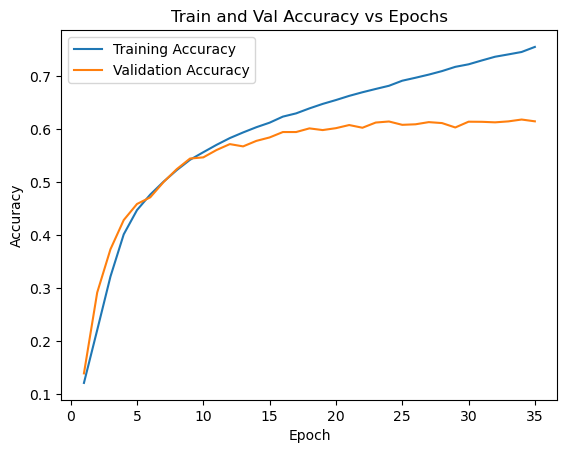

In [55]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model =ConvNet()
train_accuracy_list, val_accuracy_list = train(model, device, train_loader, val_loader)
plt.plot(range(1, 36), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, 36), val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Val Accuracy vs Epochs')
plt.legend()
plt.show()

In [67]:
def test(model, test_loader, device):
    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)  # Move data to GPU

            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += c[i].item()
                class_total[label] += 1

    for i in range(10):
        print(f'Test Accuracy of Class {i}: {100 * class_correct[i] / class_total[i]:.2f}%')

# Test the model on the test dataset using CUDA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
test(model, test_loader, device)


Test Accuracy of Class 0: 0.00%
Test Accuracy of Class 1: 100.00%
Test Accuracy of Class 2: 0.00%
Test Accuracy of Class 3: 0.00%
Test Accuracy of Class 4: 0.00%
Test Accuracy of Class 5: 0.00%
Test Accuracy of Class 6: 0.00%
Test Accuracy of Class 7: 0.00%
Test Accuracy of Class 8: 0.00%
Test Accuracy of Class 9: 0.00%


In [57]:
class ConvNetWithoutLastLayer(nn.Module):
    def __init__(self):
        super(ConvNetWithoutLastLayer, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # Define max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Define fully connected layers without last layer
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)

    def forward(self, x):
        # Forward pass through convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output for fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        # Forward pass through fully connected layers without last layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

cuda
Epoch [1/35], Train Accuracy: 0.2233, Val Accuracy: 0.3237
Epoch [2/35], Train Accuracy: 0.3465, Val Accuracy: 0.3848
Epoch [3/35], Train Accuracy: 0.4040, Val Accuracy: 0.4308
Epoch [4/35], Train Accuracy: 0.4471, Val Accuracy: 0.4713
Epoch [5/35], Train Accuracy: 0.4772, Val Accuracy: 0.4802
Epoch [6/35], Train Accuracy: 0.5020, Val Accuracy: 0.5126
Epoch [7/35], Train Accuracy: 0.5224, Val Accuracy: 0.5141
Epoch [8/35], Train Accuracy: 0.5372, Val Accuracy: 0.5374
Epoch [9/35], Train Accuracy: 0.5524, Val Accuracy: 0.5493
Epoch [10/35], Train Accuracy: 0.5661, Val Accuracy: 0.5625
Epoch [11/35], Train Accuracy: 0.5795, Val Accuracy: 0.5644
Epoch [12/35], Train Accuracy: 0.5910, Val Accuracy: 0.5793
Epoch [13/35], Train Accuracy: 0.6011, Val Accuracy: 0.5855
Epoch [14/35], Train Accuracy: 0.6124, Val Accuracy: 0.5702
Epoch [15/35], Train Accuracy: 0.6220, Val Accuracy: 0.5948
Epoch [16/35], Train Accuracy: 0.6318, Val Accuracy: 0.5951
Epoch [17/35], Train Accuracy: 0.6411, Val A

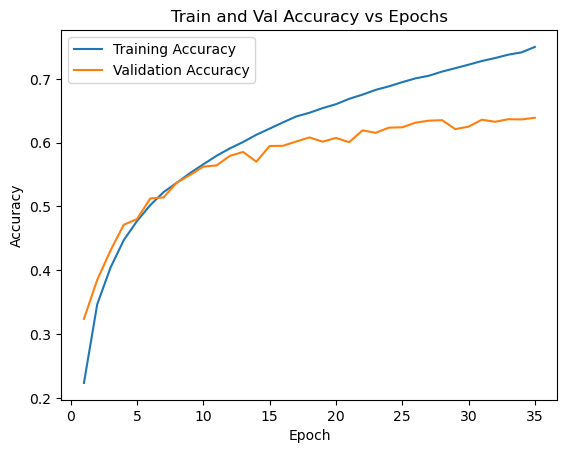

In [58]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model=ConvNetWithoutLastLayer()
train_accuracy_list, val_accuracy_list = train(model, device, train_loader, val_loader)
plt.plot(range(1, 36), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, 36), val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Val Accuracy vs Epochs')
plt.legend()
plt.show()

In [59]:
class ConvNetWithIncreasedNeurons(nn.Module):
    def __init__(self):
        super(ConvNetWithIncreasedNeurons, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        # Define max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Define fully connected layers with increased neurons in first layer
        self.fc1 = nn.Linear(16 * 5 * 5, 1000)
        self.fc2 = nn.Linear(1000, 120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84, 10)  # Output layer for 10 classes

    def forward(self, x):
        # Forward pass through convolutional layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        # Flatten the output for fully connected layers
        x = x.view(-1, 16 * 5 * 5)
        # Forward pass through fully connected layers with increased neurons in first layer
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x

cuda
Epoch [1/35], Train Accuracy: 0.1038, Val Accuracy: 0.1069
Epoch [2/35], Train Accuracy: 0.1739, Val Accuracy: 0.2480
Epoch [3/35], Train Accuracy: 0.2808, Val Accuracy: 0.3350
Epoch [4/35], Train Accuracy: 0.3649, Val Accuracy: 0.3776
Epoch [5/35], Train Accuracy: 0.4212, Val Accuracy: 0.4387
Epoch [6/35], Train Accuracy: 0.4601, Val Accuracy: 0.4623
Epoch [7/35], Train Accuracy: 0.4899, Val Accuracy: 0.4987
Epoch [8/35], Train Accuracy: 0.5202, Val Accuracy: 0.5102
Epoch [9/35], Train Accuracy: 0.5370, Val Accuracy: 0.5262
Epoch [10/35], Train Accuracy: 0.5608, Val Accuracy: 0.5609
Epoch [11/35], Train Accuracy: 0.5829, Val Accuracy: 0.5631
Epoch [12/35], Train Accuracy: 0.5992, Val Accuracy: 0.5865
Epoch [13/35], Train Accuracy: 0.6172, Val Accuracy: 0.5968
Epoch [14/35], Train Accuracy: 0.6338, Val Accuracy: 0.6003
Epoch [15/35], Train Accuracy: 0.6479, Val Accuracy: 0.5979
Epoch [16/35], Train Accuracy: 0.6617, Val Accuracy: 0.6166
Epoch [17/35], Train Accuracy: 0.6787, Val A

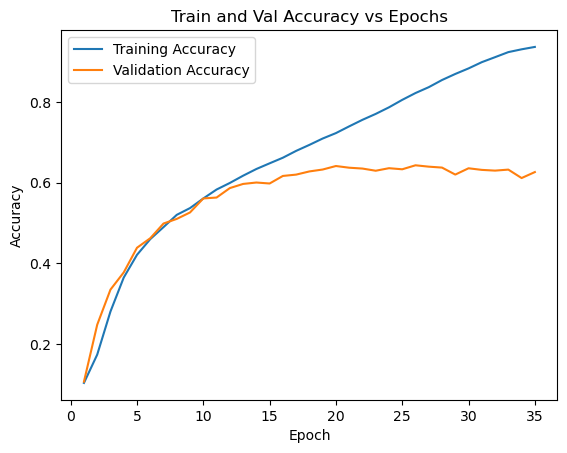

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model=ConvNetWithIncreasedNeurons()
train_accuracy_list, val_accuracy_list = train(model, device, train_loader, val_loader)
plt.plot(range(1, 36), train_accuracy_list, label='Training Accuracy')
plt.plot(range(1, 36), val_accuracy_list, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train and Val Accuracy vs Epochs')
plt.legend()
plt.show()